## Shipping Delays

#### 1. Import Libraries and Data
#### 2. Elbow Technique
#### 3. K-Means Clustering

### Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# Identify path
path = r'/Users/abrockk12.wv.us/Documents/Career Foundry/Brazilian E_Commerce'

In [4]:
# Import data
df = pd.read_pickle(os.path.join(path, 'e_commerce_cleaner.pkl'))
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,geolocation_city,geolocation_state,shipping_time,shipping_days,shipping_speed
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,NaN,NaN,NaT,nan,nan,campos dos goytacazes,RJ,8 days 01:58:13,8.0,Average Shipping
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,NaN,NaT,nan,nan,santa fe do sul,SP,16 days 16:59:11,16.0,Slow Shipping
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,NaN,NaN,NaT,nan,nan,pará de minas,MG,8 days 10:30:46,8.0,Average Shipping
5,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,NaN,NaN,NaT,nan,nan,atibaia,SP,6 days 15:22:21,6.0,Quick Shipping
6,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,NaN,NaN,NaT,nan,nan,varzea paulista,SP,25 days 14:32:18,25.0,Slow Shipping


In [5]:
df.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    3
payment_type                          0
payment_installments                  3
payment_value                         3
review_id                             0
review_score                        824
review_comment_title                  0
review_comment_message                0
review_creation_date                824
review_answer_timestamp             824
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          1
order_delivered_customer_date         0
order_estimated_delivery_date         0
product_category_name                 0


In [6]:
df.dtypes

order_id                                  object
order_item_id                              int64
product_id                                object
seller_id                                 object
shipping_limit_date                       object
price                                    float64
freight_value                            float64
payment_sequential                       float64
payment_type                              object
payment_installments                     float64
payment_value                            float64
review_id                                 object
review_score                             float64
review_comment_title                      object
review_comment_message                    object
review_creation_date              datetime64[ns]
review_answer_timestamp           datetime64[ns]
customer_id                               object
order_status                              object
order_purchase_timestamp                  object
order_approved_at   

In [7]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [8]:
df = df.drop(['declared_product_catalog_size', 'declared_monthly_revenue', 'first_contact_date', 'landing_page_id', 'origin', 'business_type', 'business_segment', 'mql_id', 'sdr_id', 'sr_id'], axis = 1)

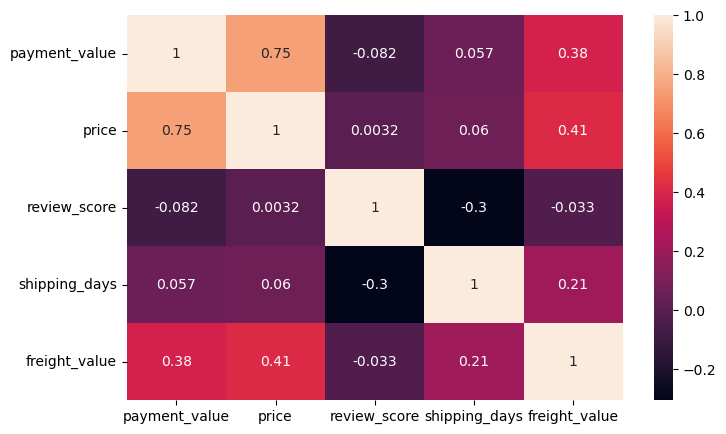

In [25]:
# Create correlation with shipping and reviews
df2 = df[['payment_value', 'price', 'review_score', 'shipping_days', 'freight_value']]
f,ax = plt.subplots(figsize=(8,5))

corr = sns.heatmap(df2.corr(), annot = True, ax = ax)

In [9]:
shipping = df[['order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']]

In [10]:
shipping.head()

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
3,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
5,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
6,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [11]:
shipping_delays = df[df['order_delivered_customer_date']>df['order_estimated_delivery_date']]

In [12]:
shipping_delays['shipping_delay_num'] = shipping_delays['order_delivered_customer_date'] - shipping_delays['order_estimated_delivery_date']

/var/folders/17/dzgpwljj3579pqd48l7mhty40000gn/T/ipykernel_57281/3403495854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_delays['shipping_delay_num'] = shipping_delays['order_delivered_customer_date'] - shipping_delays['order_estimated_delivery_date']


In [13]:
shipping_delays['customer_city'].value_counts()

customer_city
sao paulo               1080
rio de janeiro           860
salvador                 232
belo horizonte           194
porto alegre             180
                        ... 
paraipaba                  1
ingai                      1
sao luis do quitunde       1
itatiaiucu                 1
jaguaquara                 1
Name: count, Length: 1299, dtype: int64

In [14]:
shipping_delays.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_state,product_category_name_english,lead_type,lead_behaviour_profile,geolocation_city,geolocation_state,shipping_time,shipping_days,shipping_speed,shipping_delay_num
10,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,1.0,credit_card,3.0,...,SP,health_beauty,nan,nan,santos,SP,9 days 11:42:10,9.0,Average Shipping,0 days 18:17:31
13,00063b381e2406b52ad429470734ebd5,1,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2018-07-31 17:30:39,45.00,12.98,1.0,credit_card,5.0,...,SP,fashion_bags_accessories,nan,nan,monte alto,SP,11 days 07:56:46,11.0,Average Shipping,0 days 13:56:52
28,000e906b789b55f64edcb1f84030f90d,1,57d79905de06d8897872c551bfd09358,ea8482cd71df3c1969d7b9473ff13abc,2017-11-27 19:09:02,21.99,11.85,1.0,credit_card,3.0,...,SP,telephony,nan,nan,santa cruz do rio pardo,SP,18 days 10:18:21,18.0,Slow Shipping,2 days 17:27:23
55,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29,1.0,credit_card,10.0,...,AL,computers_accessories,nan,nan,campo alegre,AL,46 days 22:06:48,46.0,Slow Shipping,4 days 08:32:07
65,001c85b5f68d2be0cb0797afc9e8ce9a,1,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2017-11-29 22:38:47,99.00,13.71,1.0,credit_card,4.0,...,SP,bed_bath_table,nan,nan,sao paulo,SP,28 days 07:58:53,28.0,Slow Shipping,8 days 18:37:40


In [15]:
shipping_delays['shipping_delay_num'].describe()

count                          8712
mean      9 days 10:20:42.857438016
std      13 days 19:19:26.765828443
min                 0 days 00:03:36
25%                 1 days 20:38:31
50%                 5 days 18:42:47
75%         11 days 18:39:49.750000
max               188 days 23:24:07
Name: shipping_delay_num, dtype: object

In [16]:
shipping_delays['shipping_delay_num'] = shipping_delays['shipping_delay_num'] + pd.Timedelta('12h')

/var/folders/17/dzgpwljj3579pqd48l7mhty40000gn/T/ipykernel_57281/669916648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_delays['shipping_delay_num'] = shipping_delays['shipping_delay_num'] + pd.Timedelta('12h')


In [17]:
shipping_delays['shipping_delay_days'] = shipping_delays['shipping_delay_num'].dt.days

/var/folders/17/dzgpwljj3579pqd48l7mhty40000gn/T/ipykernel_57281/353531012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_delays['shipping_delay_days'] = shipping_delays['shipping_delay_num'].dt.days


In [18]:
shipping_delays.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_category_name_english,lead_type,lead_behaviour_profile,geolocation_city,geolocation_state,shipping_time,shipping_days,shipping_speed,shipping_delay_num,shipping_delay_days
10,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,1.0,credit_card,3.0,...,health_beauty,nan,nan,santos,SP,9 days 11:42:10,9.0,Average Shipping,1 days 06:17:31,1
13,00063b381e2406b52ad429470734ebd5,1,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2018-07-31 17:30:39,45.00,12.98,1.0,credit_card,5.0,...,fashion_bags_accessories,nan,nan,monte alto,SP,11 days 07:56:46,11.0,Average Shipping,1 days 01:56:52,1
28,000e906b789b55f64edcb1f84030f90d,1,57d79905de06d8897872c551bfd09358,ea8482cd71df3c1969d7b9473ff13abc,2017-11-27 19:09:02,21.99,11.85,1.0,credit_card,3.0,...,telephony,nan,nan,santa cruz do rio pardo,SP,18 days 10:18:21,18.0,Slow Shipping,3 days 05:27:23,3
55,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29,1.0,credit_card,10.0,...,computers_accessories,nan,nan,campo alegre,AL,46 days 22:06:48,46.0,Slow Shipping,4 days 20:32:07,4
65,001c85b5f68d2be0cb0797afc9e8ce9a,1,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2017-11-29 22:38:47,99.00,13.71,1.0,credit_card,4.0,...,bed_bath_table,nan,nan,sao paulo,SP,28 days 07:58:53,28.0,Slow Shipping,9 days 06:37:40,9


In [19]:
# group by state to see shipping delays by state
delays_by_state = shipping_delays.groupby('geolocation_state').agg({'shipping_delay_days':'mean'}).sort_values(by = 'shipping_delay_days', ascending = False)
delays_by_state

,shipping_delay_days
geolocation_state,
AP,73.000000
RR,37.200000
AC,19.000000
AM,18.285714
SE,15.459016
CE,13.944954
RN,13.452830
RJ,12.749319
PA,12.236641


In [20]:
# group by product to see shipping delays by product
delays_by_category = shipping_delays.groupby('product_category_name_english').agg({'shipping_delay_days':'mean'}).sort_values(by = 'shipping_delay_days', ascending = False)
delays_by_category.head(25)

,shipping_delay_days
product_category_name_english,
home_appliances_2,20.000000
furniture_mattress_and_upholstery,15.800000
air_conditioning,15.272727
food_drink,12.705882
home_confort,12.681818
music,12.666667
home_comfort_2,12.600000
drinks,12.000000
signaling_and_security,11.363636


In [21]:
# Export data
shipping_delays.to_csv(os.path.join(path, 'shipping_delays.csv'))
df.to_pickle(os.path.join(path, 'e_commerce_final.pkl'))